Using the dataset attached, attempt the following questions;

1. Compute the mean, median, and standard deviation for BMI, PhysicalHealth, MentalHealth, and SleepTime.

2. Determine the proportion of individuals with heart disease in the dataset.

3. Analyze the distribution of age categories in the dataset using appropriate visualization.

4. Compare the average BMI between individuals with and without heart disease. Use visualization to support your findings.

5. Investigate the relationship between physical activity and general health. Present your analysis using an appropriate visualization.

6. Does smoking have a significant association with heart disease? Use a statistical test to validate your claim.

7. Explore the correlation between sleep time and mental health. What insights can you draw?

8. Build a logistic regression model to predict heart disease based on BMI, physical activity, smoking, and diabetes status.

9. If you were to predict heart disease based on this dataset, which features would you include in your model, and why?

10. Based on the findings from the dataset, what recommendations can you give to reduce the risk of heart disease?

In [64]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [65]:
# Importing data
df = pd.read_csv("heart_2020_cleaned.csv")

In [66]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [67]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [68]:
df.isna().any().any()

False

##### 1. Compute the mean, median, and standard deviation for BMI, PhysicalHealth, MentalHealth, and SleepTime.

In [70]:
# Function to calculate mean,median and std
def statistics(df, col):
    print(f"{col} mean: {df[col].mean()}")
    print(f"{col} median: {df[col].median()}")
    print(f"{col} standard deviation: {df[col].std()}")

In [71]:
# Calculating mean, median and std for bmi column
statistics(df,"BMI")

BMI mean: 28.325398520927465
BMI median: 27.34
BMI standard deviation: 6.356100200471519


In [72]:
# Calculating mean, median and std for PhysicalHealth column
statistics(df,"PhysicalHealth")

PhysicalHealth mean: 3.3717100017198516
PhysicalHealth median: 0.0
PhysicalHealth standard deviation: 7.95085018257456


In [73]:
# Calculating mean, median and std for MentalHealth column
statistics(df,"MentalHealth")

MentalHealth mean: 3.898366140808956
MentalHealth median: 0.0
MentalHealth standard deviation: 7.955235218946832


In [74]:
# Calculating mean, median and std for SleepTime column
statistics(df,"SleepTime")

SleepTime mean: 7.097074688472302
SleepTime median: 7.0
SleepTime standard deviation: 1.4360070609668765


##### 2. Determine the proportion of individuals with heart disease in the dataset.

In [76]:
# Checking the distribution of heart disease 
df.HeartDisease.value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

##### 3. Analyze the distribution of age categories in the dataset using appropriate visualization.

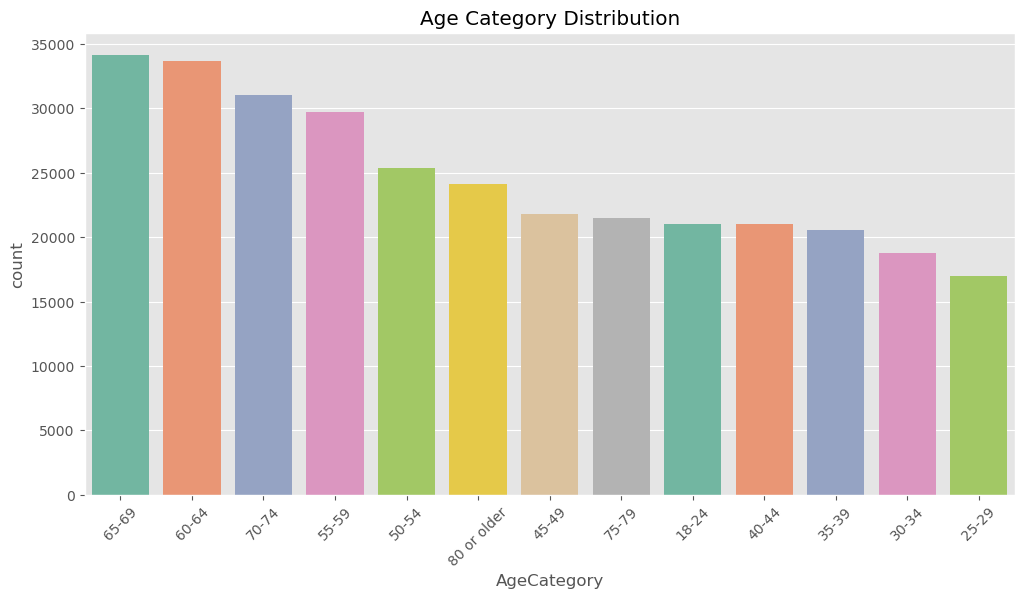

In [78]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a count plot
sns.countplot(data=df, x="AgeCategory", palette="Set2", order=df["AgeCategory"].value_counts().index)

# Adding title
plt.title("Age Category Distribution")
plt.xticks(rotation=45)
plt.show()

##### 4. Compare the average BMI between individuals with and without heart disease. Use visualization to support your findings.

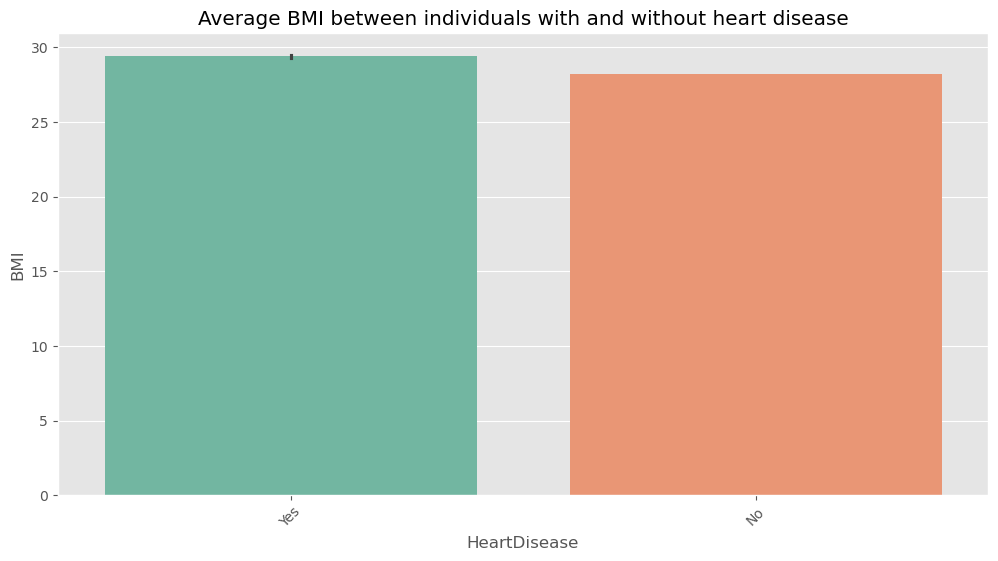

In [80]:
# setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a bar plot
sns.barplot(data=df, x="HeartDisease", y="BMI", palette="Set2",
           order=df.groupby("HeartDisease")["BMI"].mean().sort_values(ascending=False).index)

# Adding labels and title
plt.xlabel("HeartDisease")
plt.ylabel("BMI")
plt.title("Average BMI between individuals with and without heart disease")
plt.xticks(rotation=45)

plt.show()

##### 5. Investigate the relationship between physical activity and general health. Present your analysis using an appropriate visualization.

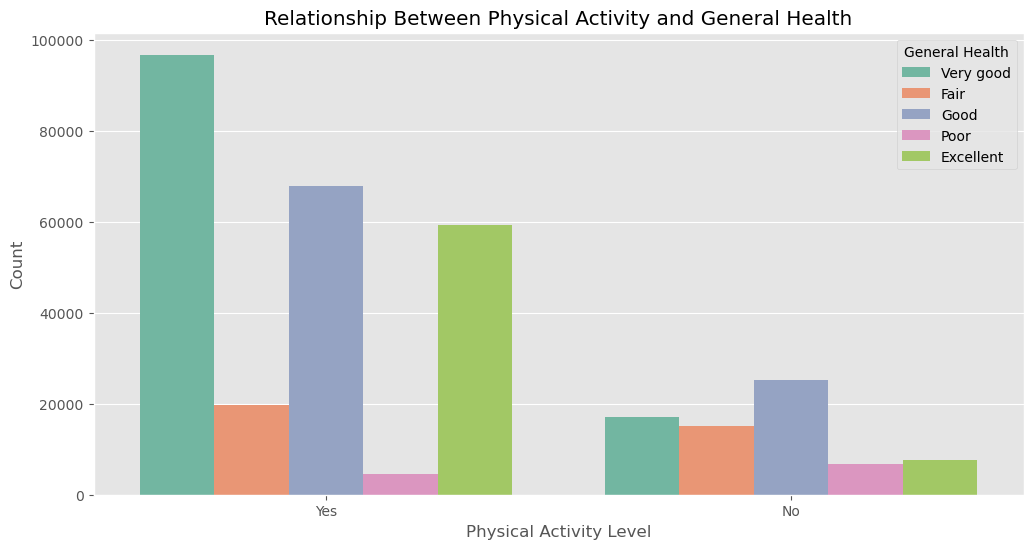

In [82]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a count plot
sns.countplot(data=df, x="PhysicalActivity", hue="GenHealth", palette="Set2")

# Adding title
plt.title("Relationship Between Physical Activity and General Health")
plt.xlabel("Physical Activity Level")
plt.ylabel("Count")
plt.legend(title="General Health")
plt.show()

##### 6. Does smoking have a significant association with heart disease? Use a statistical test to validate your claim.

In [84]:
import scipy.stats as stats

# Null Hypothesis - there is no significant relationship between Smoking and HeartDisease
# Alternative Hypothesis - there is a significant relationship between Smoking and HeartDisease
# Significance level - 0.05

# Creating a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['HeartDisease'])

# Performing  Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Printing results
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'P-value: {p:.4f}')
print(f'Degrees of Freedom: {dof}')

Chi-Square Statistic: 3713.0331
P-value: 0.0000
Degrees of Freedom: 1


There is a significant relationship between smoking and heart disease.

##### 7. Explore the correlation between sleep time and mental health. What insights can you draw?


In [87]:
# Correlation between sleep time and mental health
df["SleepTime"].corr(df["MentalHealth"])

-0.11971678803142115

##### 8. Build a logistic regression model to predict heart disease based on BMI, physical activity, smoking, and diabetes status.


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
train = df[['BMI', 'PhysicalActivity', 'Smoking', 'Diabetic','HeartDisease']]
train.head()

BMI PhysicalActivity Smoking Diabetic HeartDisease
0  16.60              Yes     Yes      Yes           No
1  20.34              Yes      No       No           No
2  26.58              Yes     Yes      Yes           No
3  24.21               No      No       No           No
4  23.71              Yes      No       No           No

In [91]:
# Label encoding binary categorical columns
binary_cols = ['Smoking', 'PhysicalActivity', 'HeartDisease']
for col in binary_cols:
    train[col] = train[col].map({'No': 0, 'Yes': 1})

# One hot encoding the 'Diabetic' column only
train = pd.get_dummies(train, columns=['Diabetic'], dtype=int)

In [92]:
X = train.drop("HeartDisease",axis=1)
y = train.HeartDisease

In [93]:
# Instantiating logistic regression model
lr = LogisticRegression(random_state=42)

# Fitting the model to the training data
lr.fit(X,y)

LogisticRegression(random_state=42)

In [94]:
# Making prediction using the model
lr_preds = lr.predict(X)

# Calculating the accuracy 
accuracy = accuracy_score(y,lr_preds)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9144


##### 9. If you were to predict heart disease based on this dataset, which features would you include in your model, and why?

In [96]:
from sklearn.feature_selection import mutual_info_classif

# Converting categorical variables to numeric using Label encoder
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Defining the independent and dependent variables
X = df_encoded.drop(columns=['HeartDisease']) 
y = df_encoded['HeartDisease']

# Computing Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Converting to DataFrame
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Displaying important features
print(mi_scores)

PhysicalActivity    0.063877
Race                0.059032
GenHealth           0.051146
Sex                 0.042035
AgeCategory         0.036888
Smoking             0.033632
SleepTime           0.019822
DiffWalking         0.018594
Diabetic            0.016017
Stroke              0.012739
PhysicalHealth      0.012678
KidneyDisease       0.007625
SkinCancer          0.005607
Asthma              0.004424
BMI                 0.002908
MentalHealth        0.001865
AlcoholDrinking     0.000887
dtype: float64


##### Features with high importance
- Physical Activity - Not participating in any physical activities is an established risk factor for heart disease.
- Race - Genetic and sociocultural factors lead to some ethnic populations having higher prevalence rates for some diseases.
- Gen Health - Poor general health reported by patients is associated with greater underlying diseases.
- Sex - Hormones and lifestyle predispose males and females differently to the risks of heart disease.
- Age Category - Age Category confirms that the risk of heart disease increases as one ages.
- Smoking - Smokers tend to have a significantly higher risk of heart disease.

These features have higher MI scores meaning they contribute the most to predicting heart disease. They are also important from a medical perspective in light of the existing research on heart disease.

##### Feature with moderate importance
- SleepTime - Recent studies suggest that lack of sleep can have a harmful effect on cardiovascular health. 
- DiffWalking - Having difficulty walking often indicates some sort of circulatory issue or heart disease. 
- Diabetic - Diabetic people are at a greater risk of suffering from heart disease. 
- PhysicalHealth- Long-term illness can impact the health of the heart. 
- Stroke - Having a history of strokes could suggest the possibility of heart disease.

While these features have lower MI scores they are  relevant because they relate to lifestyle and pre existing health conditions which are known contributors to heart disease.

##### 10. Based on the findings from the dataset, what recommendations can you give to reduce the risk of heart disease?

1. Increase physical activity by performing at least 150 minutes of exercise per week to improve cardiovascular health.
2. Encourage regular health checkups, especially for risk groups such as individuals over 40 years old, males, and certain racial groups.
3. Reduce smoking through quit smoking initiatives and health promotion activities on its association with heart disease.
4. Improve overall heart health by spending seven to nine hours of restful sleep per night.  
5. Control diabetes by managing blood sugar levels as well as increasing dietary fiber and reducing sugar consumption.  
6. Promote the circulation of blood and mobility through light exercises to minimize the risk of heart disease caused by lack of physical activity.